In [2]:
%matplotlib inline

In [3]:
from fenics import *
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


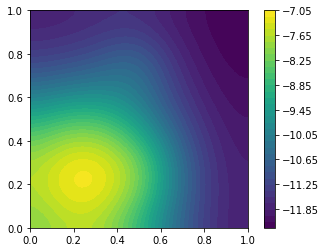

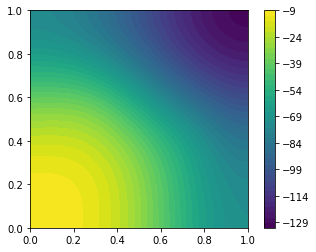

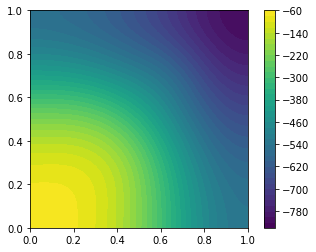

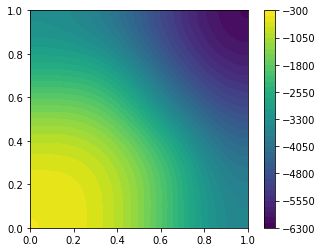

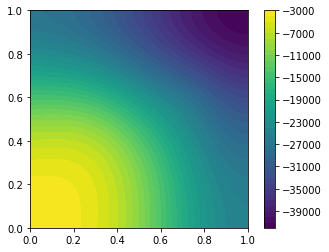

done


In [5]:
# "Global params"
lambda_ = 10
rho = 5
u = Expression('b*exp(-a*(pow(x[0]-0.25, 2) + pow(x[1]-0.25, 2)))', degree=2, a=10, b=20)

# Set time parameters
T = 2.0
num_steps = 100
dt = T/num_steps
t = T

# Define function space
nx = 50
ny = 50
mesh = UnitSquareMesh(nx,ny)
V = FunctionSpace(mesh, 'P', 1)

# Specify end time condition for adjoint variable
p_end = Constant(-1*lambda_)
p_n = interpolate(p_end, V)

# Define growth threshold and control
a = Constant(10)
# q = Constant(5)
str1 = 'b*exp(-a*pow(x[0] - (0.5 - 0.25*sin(3.14*t)), 2) - a*pow(x[1] - (0.5 - 0.25*cos(3.14*t)), 2)) + '
str2 = 'b*exp(-a*pow(x[0] - (0.5 + 0.25*sin(3.14*t)), 2) - a*pow(x[1] - (0.5 + 0.25*cos(3.14*t)), 2))'
string = str1 + str2
q = Expression(string, degree=2, a=50, b=10, t=0)
q_n = interpolate(q, V)

# Define variational problem
p = TrialFunction(V)
phi = TestFunction(V)

a = p*phi*dx + dt*(dot(grad(p), grad(phi)) + p*(2*u-a+q)*phi)*dx
l = p_n*phi*dx - dt*exp(-1*rho*t)*q*phi*dx

# Iterating in time
p = Function(V)

for i in range(num_steps):
    t -= dt
    q.t = t
    
    solve(a == l, p)
    p_n.assign(p)
    
    # Plot
    if i%20 == 0:
        pp = plot(p)
        plt.colorbar(pp)
        plt.show()
        
print("done")